In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

In [16]:
filename = "finalalldata.csv"
data = pd.read_csv(filename)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         633 non-null    object 
 1   label       633 non-null    int64  
 2   sex         633 non-null    int64  
 3   age         633 non-null    int64  
 4   bmi         633 non-null    float64
 5   smoke       633 non-null    int64  
 6   location    633 non-null    float64
 7   rs10007052  624 non-null    float64
 8   rs8192288   628 non-null    float64
 9   rs20541     629 non-null    float64
 10  rs12922394  628 non-null    float64
 11  rs2910164   629 non-null    float64
 12  rs161976    598 non-null    float64
 13  rs473892    633 non-null    float64
 14  rs159497    595 non-null    float64
 15  rs9296092   620 non-null    float64
 16  class       633 non-null    object 
dtypes: float64(11), int64(4), object(2)
memory usage: 84.2+ KB


In [17]:
data.shape

(633, 17)

C:\Users\anomi\AppData\Local\Temp\ipykernel_26180\1583166416.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(data.groupby(['label']).mean().T[:4])


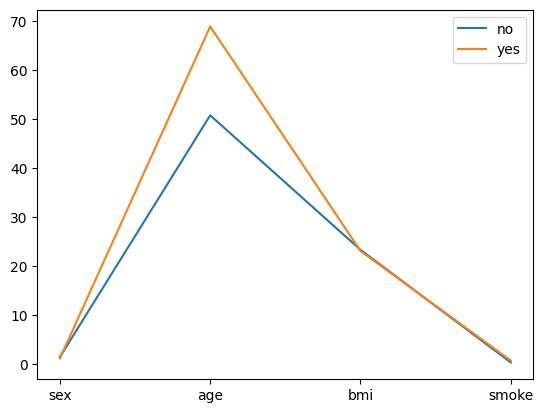

C:\Users\anomi\AppData\Local\Temp\ipykernel_26180\1583166416.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['label']).mean().T[:4]


label,0,1
sex,1.489583,1.176871
age,50.791667,68.913832
bmi,23.356068,23.118737
smoke,0.369792,0.746032


In [18]:
#preproccessing
plt.plot(data.groupby(['label']).mean().T[:4])
plt.legend(["no","yes"])
plt.show()
data.groupby(['label']).mean().T[:4]

In [19]:
print(data.label.value_counts())
print(data.describe())

1    441
0    192
Name: label, dtype: int64
            label         sex         age         bmi       smoke    location  \
count  633.000000  633.000000  633.000000  633.000000  633.000000  633.000000   
mean     0.696682    1.271722   63.417062   23.190724    0.631912    6.617678   
std      0.460055    0.445199   15.369700    3.661055    0.482667    1.523725   
min      0.000000    1.000000   21.000000   14.300000    0.000000    4.630000   
25%      0.000000    1.000000   55.000000   20.730000    0.000000    5.310000   
50%      1.000000    1.000000   66.000000   23.030000    1.000000    6.880000   
75%      1.000000    2.000000   75.000000   25.240000    1.000000    7.780000   
max      1.000000    2.000000   98.000000   43.560000    1.000000    8.720000   

       rs10007052   rs8192288     rs20541  rs12922394   rs2910164    rs161976  \
count  624.000000  628.000000  629.000000  628.000000  629.000000  598.000000   
mean     1.391994    0.891881    0.804953    0.859815    1.40674

In [20]:
data.isnull().sum()

uid            0
label          0
sex            0
age            0
bmi            0
smoke          0
location       0
rs10007052     9
rs8192288      5
rs20541        4
rs12922394     5
rs2910164      4
rs161976      35
rs473892       0
rs159497      38
rs9296092     13
class          0
dtype: int64

In [21]:
def null_values_filler(data):
    for col in range(2,len(data.columns)-1):
        data[data.columns[col]].fillna(data[data.columns[col]].mean(),inplace = True)
    return data

def load_data(data):
    data = null_values_filler(data)
    X = data.drop(['uid','label','class'],axis=1)
    y = data.label
    return X,y

def labelindexer(train_y):
    new_train_y = np.zeros((train_y.shape[0],2))
    # for i in range(len(new_train_y)):
    #     print(i)
    counter = 0
    for i in train_y:
        new_train_y[counter][i] = 1
        counter += 1
        
    train_y = new_train_y
    return train_y

In [22]:
# the model has a train and test split already included in it

train_data = data[data['class'] == 'train']
test_data = data[data['class'] == 'validate']

train_data = shuffle(train_data, random_state=42)
test_data= shuffle(test_data, random_state=42)

In [23]:
print(train_data.shape)
print(test_data.shape)

(393, 17)
(240, 17)


In [24]:
train_X, train_y = load_data(train_data)
test_X, test_y = load_data(test_data)

train_y = labelindexer(train_y)
test_y = labelindexer(test_y)

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(200,activation="leaky_relu"),
    tf.keras.layers.Dense(100,activation="leaky_relu"),
    tf.keras.layers.Dense(2,activation="leaky_relu"),
    tf.keras.layers.Softmax()
])

In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 200)            │         3,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           202 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_1 (Softmax)             │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,908 (273.08 KB)

 Trainable params: 23,302 (91.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 46,606 (182.06 KB)

In [27]:
model.compile(
    optimizer = "adam",
    # loss = tf.keras.losses.MeanSquaredError,
    loss = tf.keras.losses.BinaryCrossentropy,
    metrics = ['accuracy']
)

In [28]:
train_X.shape , train_y.shape

((393, 14), (393, 2))

In [29]:
model.fit(train_X,train_y,epochs=1000)

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4647 - loss: 1.2332
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7473 - loss: 0.6173 
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7256 - loss: 0.5310 
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7546 - loss: 0.4997 
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7218 - loss: 0.5154 
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7325 - loss: 0.5037 
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7479 - loss: 0.4930 
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7463 - loss: 0.4748 
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7770 - loss: 0.4790 
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7823 - loss: 0.4800 
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7762 - loss: 0.4704 
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0

In [30]:
predictor = model.predict(test_X)
predictor.shape

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


(240, 2)

In [31]:
def maxindexer(ls):
    """Returns the index of the largest element in a list."""
    max = ls[0]
    maxindex = 0
    for i in range(1, len(ls)):
        if ls[i] > max:
            max = ls[i]
            maxindex = i
    return maxindex

In [32]:
accuracy = 0
for i, j in zip(predictor,test_y):
    if (maxindexer(i) ==  maxindexer(j)):
        accuracy += 1
print("accuracy found on test dataset: " , accuracy/len(predictor), "%")

accuracy found on test dataset:  0.8 %
